# ETH  Quantum Hackathon Alice & Bob Challenge

## Task 1.A

### Fock States

In [37]:
import dynamiqs as dq
import numpy as np
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import cvxpy as cp
import pickle
from scipy.ndimage import gaussian_filter
from scipy.interpolate import RegularGridInterpolator

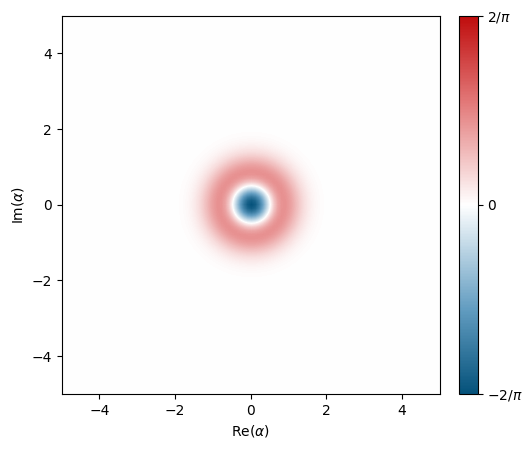

In [47]:
dq.plot.wigner(dq.fock(2, 1))

### Coherent State

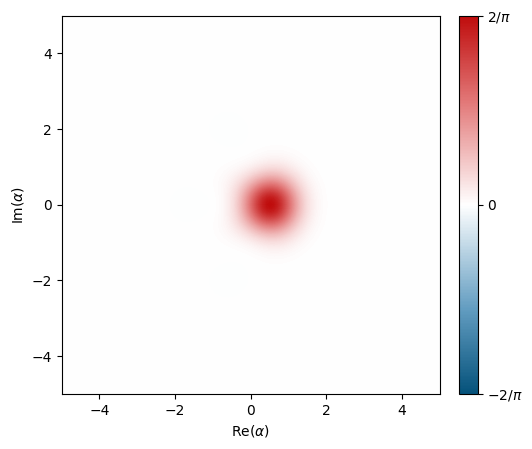

In [14]:
dq.plot.wigner(dq.coherent(4, 0.5))

### Cat states (2-cat and 3-cat states)

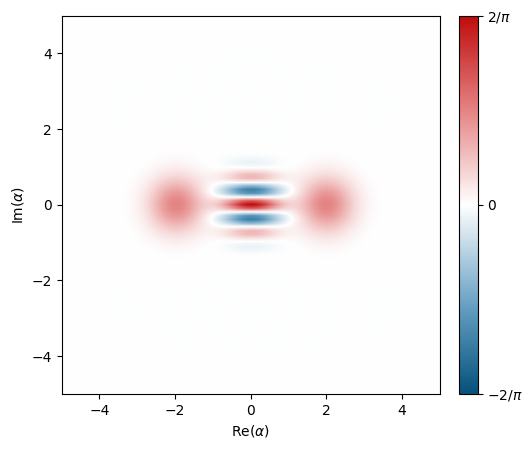

In [20]:
N = 20
cat_2_state = dq.unit(dq.coherent(N, 2)+dq.coherent(N, -2))
dq.plot.wigner(cat_2_state)

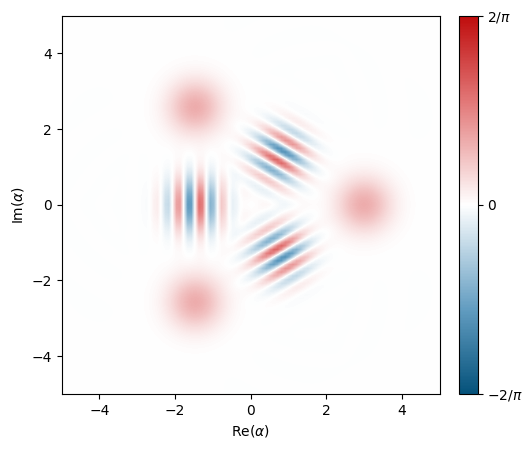

In [32]:
N=30

angles = [0, 2 * np.pi / 3, 4 * np.pi / 3]
points = [3*np.exp(1j * angle) for angle in angles]

cat_3_state = dq.unit(dq.coherent(N, points[0])+dq.coherent(N, points[1])+dq.coherent(N, points[2]))

dq.plot.wigner(cat_3_state)

### Dissipative Cat State from a Two-Photon Exchange Hamiltonian

In [44]:
T = np.linspace(0.0, 4.0, 100)
g2 = 1.0
ed = -4
kb = 10
N = 20

#psi1 = tensor(cat_state, fock(N,0))
psi2 = dq.tensor(dq.fock(N,0), dq.fock(N,0))

a = dq.tensor(dq.destroy(N), dq.eye(N))
b = dq.tensor(dq.eye(N), dq.destroy(N)) * np.sqrt(kb)

H = g2*(dq.powm(dq.dag(a),2) @ b + dq.powm(a,2) @ dq.dag(b)) + ed*(b+dq.dag(b))
result = dq.mesolve(H, [b], psi2,T)

|███████████████████████████████████| 100.0% ◆ elapsed 11.53s ◆ remaining 0.00ms


In [74]:

xvec = np.linspace(-5, 5, 200)

fig, ax = plt.subplots(figsize=(8, 6))

# Animation function
def update(frame):
    ax.clear()
    rho_a = result.states[frame].ptrace(0)
    W, xv, yv = dq.wigner(rho_a, xvec=xvec, yvec=xvec)
    
    contour = ax.contourf(W, xv, yv, 100, cmap='RdBu_r')
    ax.set_title(f'Wigner Function of Mode a at t={T[frame]:.2f}')
    ax.set_xlabel('x')
    ax.set_ylabel('p')
    return contour

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(T), blit=False)

# Save animation as GIF
ani.save('wigner_evolution.gif', writer='pillow', fps=10)

plt.close(fig)
